# Refined Approach

After numerous mis-steps and false assumptions, I may have a functional model.

Since the rings are binned, they are considered categorical, which means we can use classification algorithms.  See:  SVM, ensemble forest.  Re-test the latter with corrected train test split algorithm and cleaner testing functions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Convert 'sex' column to booleans.
df = pd.get_dummies(df, columns = ['sex'])

#Traditional testing/training set sources.
y = df['rings']
X = df.drop('rings', axis=1)

In [3]:
#Making sure my frames are what they're supposed to be.

print(df.head(5))
print('===========================================')
print(y.head(5))
print('===========================================')
print(X.head(5))

   length  diameter  height  whole weight  shucked weight  viscera weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   shell weight  rings  sex_F  sex_I  sex_M  
0         0.070      7      0      0      1  
1         0.210      9      1      0      0  
2         0.155     10      0      0      1  
3         0.055      7      0      1      0  
4         0.120      8      0      1      0  
0     7
1     9
2    10
3     7
4     8
Name: rings, dtype: int64
   length  diameter  height  whole weight  shucked weight  viscera weight  \
0   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   0.530     0.420   0.135        0.6770

In [4]:
#Retesting random forest with frames as-is.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

model.score(X_test,y_test)

0.26315789473684209

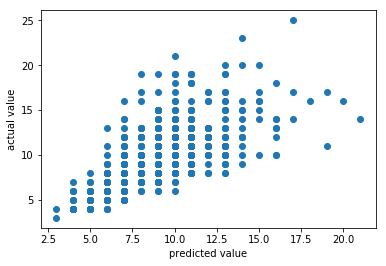

In [5]:
#Plotting predicted vs actual

plt.scatter(model.predict(X_test), y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [6]:
#NO SCALING.
#Perform PCA on whole dataframe.  Copy of Rings column still set aside as y.
#Resulting PCA models will be new Xs.
#Testing PCA component levels of 2 and 3.

pca2 = PCA(n_components=2, svd_solver='full')
pca3 = PCA(n_components=3, svd_solver='full')

X2 = pca2.fit(df).transform(df)
X3 = pca3.fit(df).transform(df)

0.982057416268


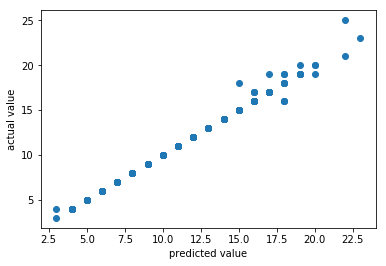

In [7]:
#X2

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

model2 = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

print(model2.score(X_test,y_test))

plt.scatter(model2.predict(X_test), y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

Success!! (?)

0.959330143541


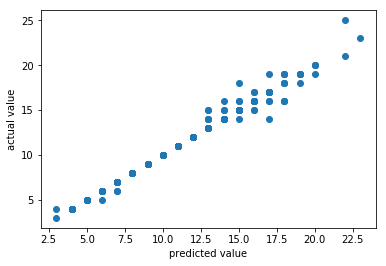

In [8]:
#X3

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

model3 = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

print(model3.score(X_test,y_test))

plt.scatter(model3.predict(X_test), y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

Less good.

0.375598086124


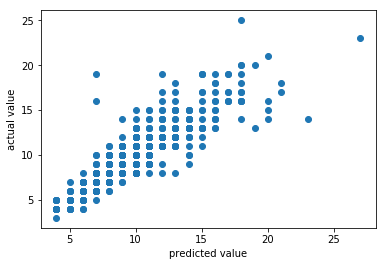

In [9]:
#Effects of scaling

scaled = StandardScaler().fit_transform(df)

pca2_scaled = PCA(n_components=2, svd_solver='full')
X2_scaled = pca2_scaled.fit(scaled).transform(scaled)

X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=0)

model_scaled = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

print(model_scaled.score(X_test,y_test))

plt.scatter(model_scaled.predict(X_test), y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

I'm either using scaling wrong or never needed it to begin with.  To think I was shooting myself in the foot the whole time.

Is this model doing well because I'm doing it right or doing it wrong?  If class is part of the original PCA data, then the algorithm is just going to be matching it up, isn't it?

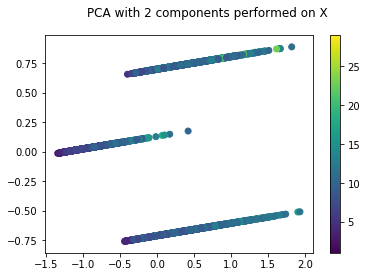

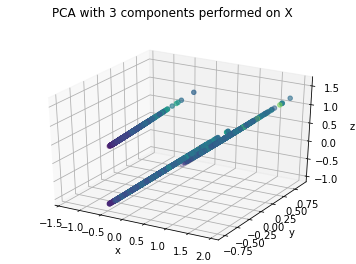

In [12]:
#What if I did PCA on X?  Unscaled.  (no 'rings' column)

pca2D = PCA(n_components=2, svd_solver='full')

pcaX = pca2D.fit(X).transform(X)
pcaX = pd.DataFrame(pcaX)

plt.scatter(pcaX[0],pcaX[1],c=y)
plt.suptitle('PCA with 2 components performed on X')
plt.colorbar()
plt.show()


from mpl_toolkits.mplot3d import Axes3D

pca3D = PCA(n_components=3, svd_solver='full')

pcaX3 = pca3D.fit(X).transform(X)
pcaX3 = pd.DataFrame(pcaX3)
pcaX3.columns = ['x','y','z']

fig = plt.figure()
plt.suptitle('PCA with 3 components performed on X')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(pcaX3['x'], pcaX3['y'], pcaX3['z'], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

0.203349282297


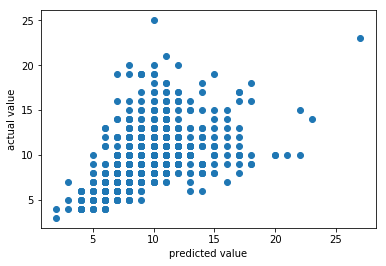

In [13]:
#And the model?

X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.2, random_state=0)

model_pcaX = RandomForestClassifier(n_estimators=30, oob_score=True).fit(X_train,y_train)

print(model_pcaX.score(X_test,y_test))

plt.scatter(model_pcaX.predict(X_test), y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()